# Case Study: Pancreatic Endocrinogenesis

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
#srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)

import celldancer.cdplt as cdplt
# import celldancer.velocity_estimation as calc_velocity
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time

## Velocity Estimation

In [13]:
%autoreload 2

#raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
#raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
# raw_path='/Users/chen.weiqing/code/celldancer/PancreaticEndocrinogenesis.csv'
raw_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
load_raw_data=pd.read_csv(raw_path)
load_raw_data

result_path = None
# result_path = '/Users/chen.weiqing/code/celldancer/pancreas/velocity_result'

## Set Parameters

In [14]:
max_epoches=200
check_n_epoch=10
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
sampling_ratio=0.125
n_neighbors=30
optimizer='Adam'
n_neighbors_downsample=30
auto_downsample=True
auto_norm_u_s=True
cost_type='smooth'
smooth_weight=0.1
patience=3
binning=True

gene_list=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b","Sulf2"]

# Velocity Estimation
brief, load_cellDancer=velocity_estimation.train(load_raw_data,\
                                                 gene_choice=gene_list,\
                                                 max_epoches=max_epoches,\
                                                 check_n_epoch=check_n_epoch,\
                                                 learning_rate=learning_rate, \
                                                 downsample_method=downsample_method,\
                                                 step_i=step_i,\
                                                 step_j=step_j,\
                                                 sampling_ratio=sampling_ratio,\
                                                 n_neighbors=n_neighbors,\
                                                 optimizer=optimizer,\
                                                 n_neighbors_downsample=n_neighbors_downsample,\
                                                 auto_downsample=auto_downsample,\
                                                 auto_norm_u_s=auto_norm_u_s,\
                                                 cost_type=cost_type,\
                                                 smooth_weight=smooth_weight,\
                                                 patience=patience,\
                                                 binning=binning,\
                                                 result_path=result_path,n_jobs=8)

Using /Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/analysis_wq/cell_dancer_velocity_2022-05-12 22-05-29 as the output path.


Velocity Estimation: 100%|████████████████████████| 1/1 [00:15<00:00, 15.49s/it]


## Sample Genes' Velocity Plot

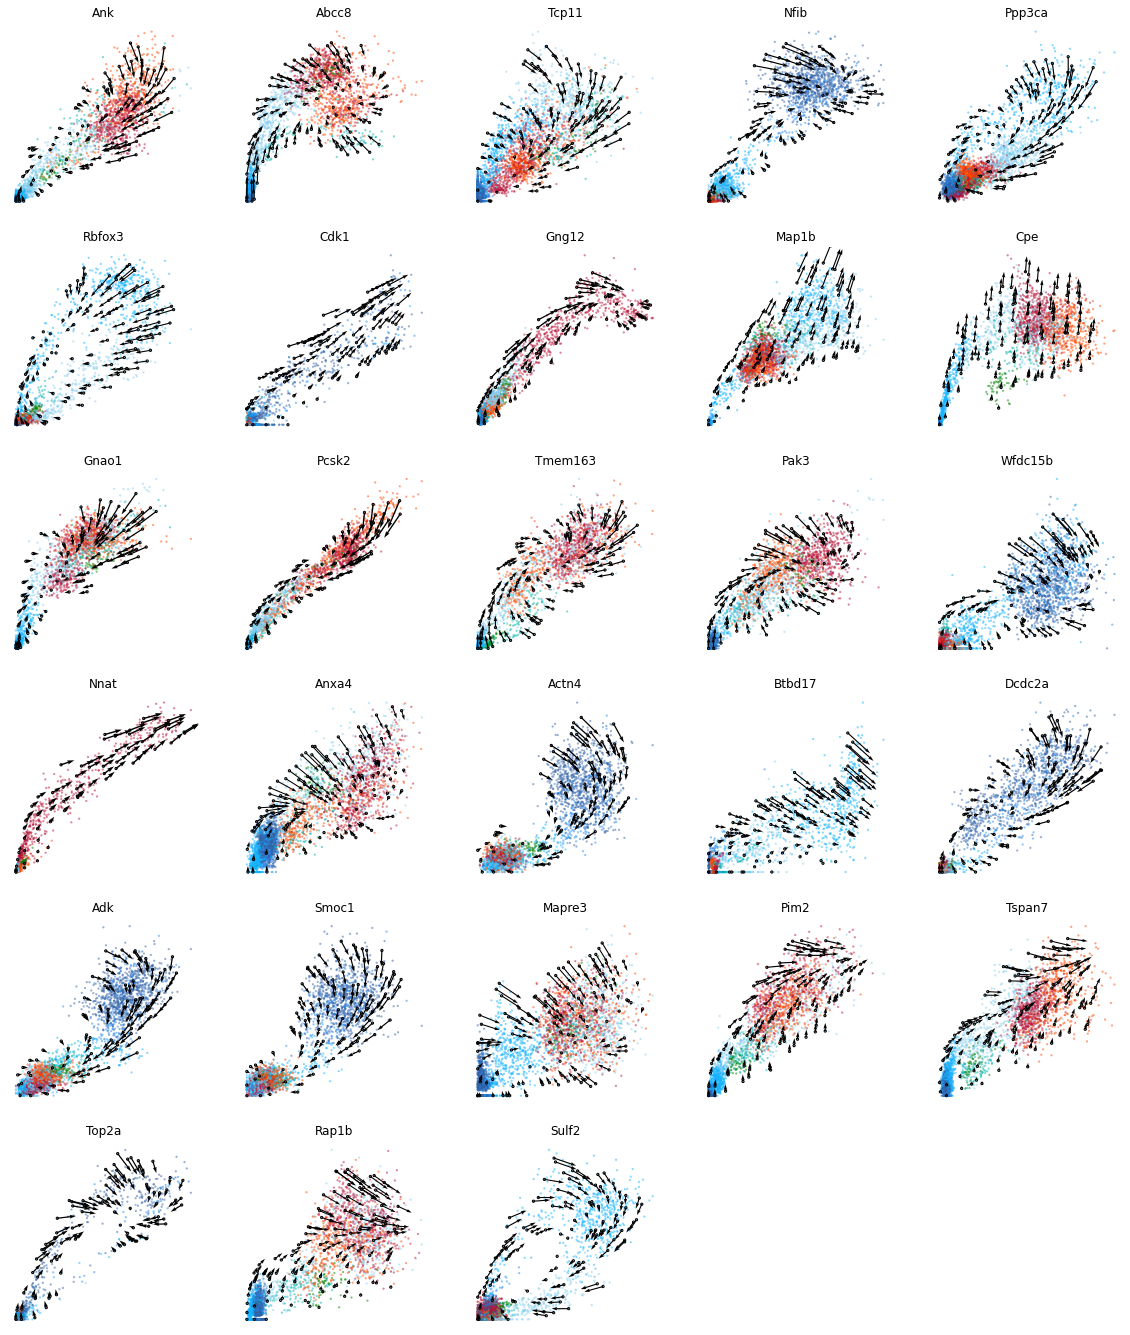

In [15]:
ncols=5

height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load velocity estimation result of 2000 genes

In [ ]:
#detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/velocity_result_all_genes_with_bin/2000_smooth/combined_detail/combined_detail.csv'
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes_with_bin/combined_detail/combined_detail.csv'
#detail_result_path = '/Users/chen.weiqing/code/celldancer/pancreas/combined_detail.csv'

load_cellDancer=pd.read_csv(detail_result_path)

## Compute Cell Velocity and Estimate Pseudotime

In [20]:
%load_ext autoreload
%autoreload 2

# set parameters
n_neighbors=5 #100
downsample_step=(60,60)
grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10
transfer_mode=None

# compute_cell_velocity
gene_choice=list(set(load_cellDancer.gene_name))
load_cellDancer=compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="embedding",
              transfer_mode=transfer_mode,#'power10',
              n_neighbors=n_neighbors,
              step=downsample_step)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(genes, cells): (2000, 3696)
After downsampling, there are  845 cells.


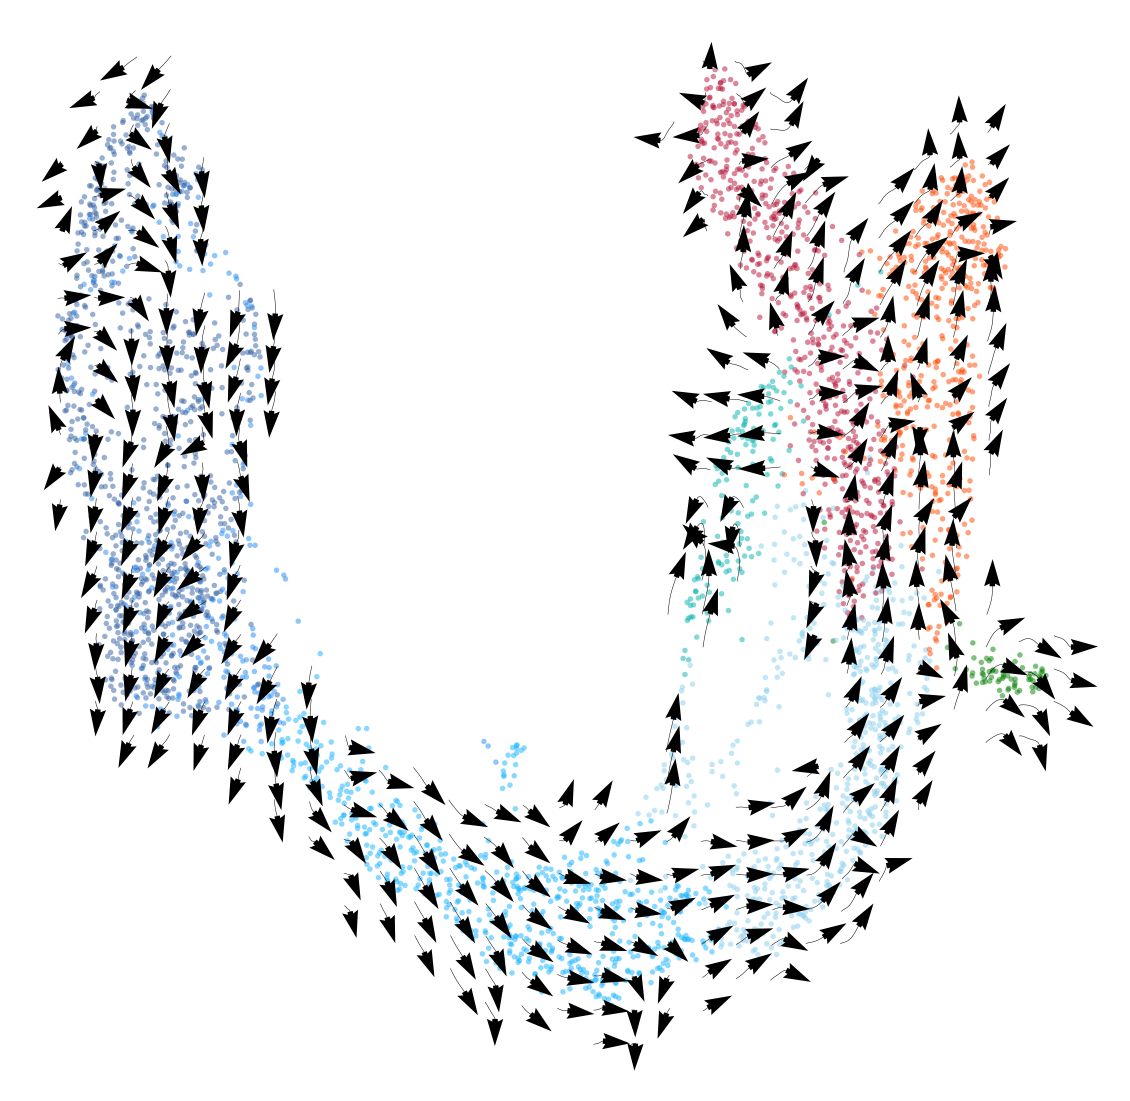

In [21]:
# plot_cell_velocity
fig, ax = plt.subplots(figsize=(20,20))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors=cdplt.colormap.colormap_pancreas, alpha=0.5, s=30,velocity=True)
ax.axis('off')
plt.show()

## Estimate pseudotime

In [22]:
%%capture
#import importlib
#importlib.reload(sys.modules['pseudo_time'])

cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], downsample_step=downsample_step, n_repeats=n_repeats)

## Plot Pseudotime

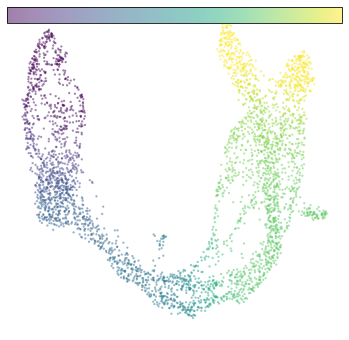

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             velocity=False)
ax.axis('off')
plt.show()

## Gene Pseudotime

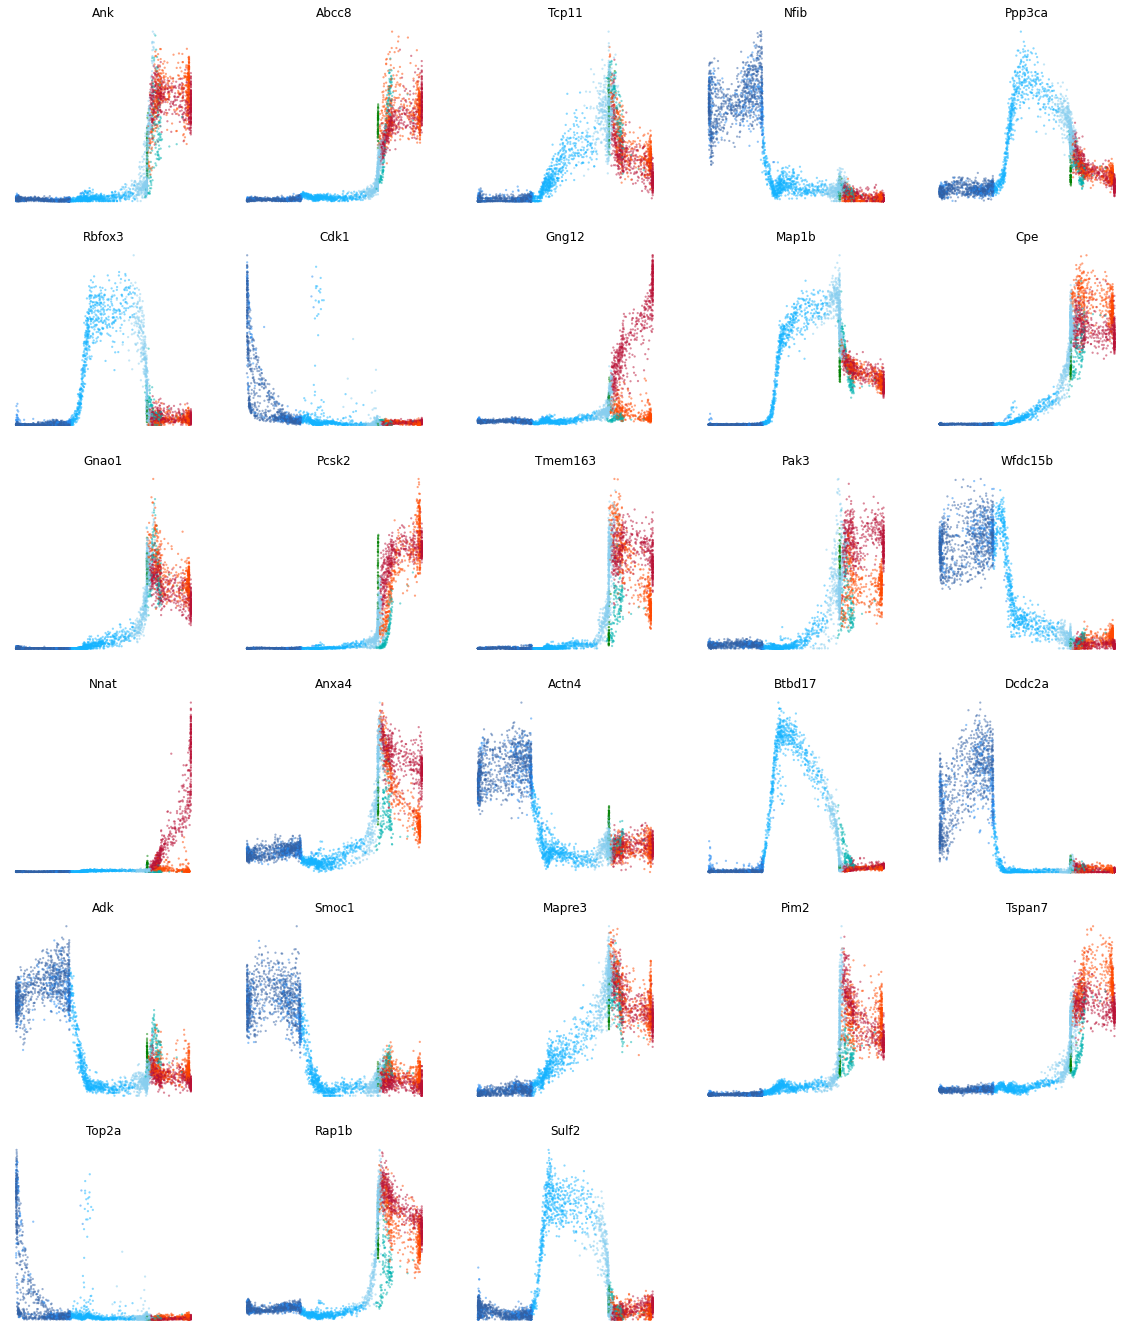

In [27]:
ncols=5
gene_list=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b","Sulf2"]

height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Gene Parameter in Cell Level

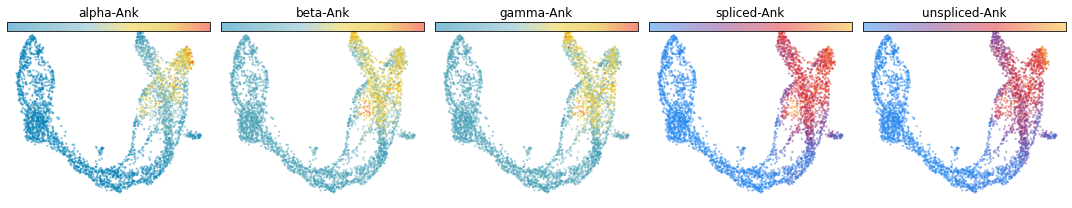

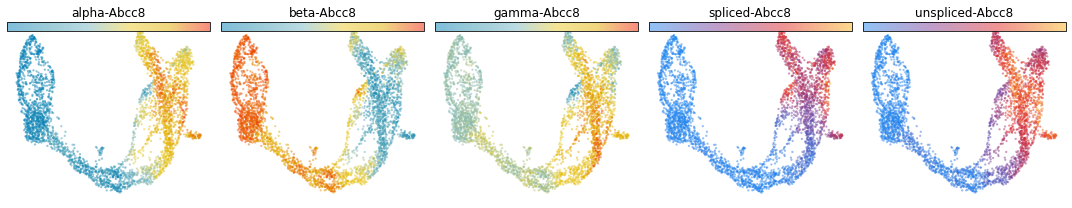

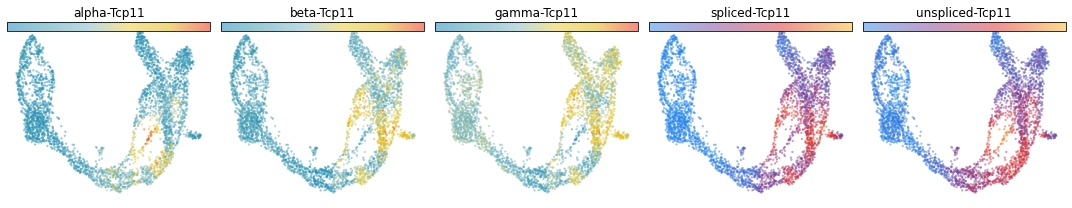

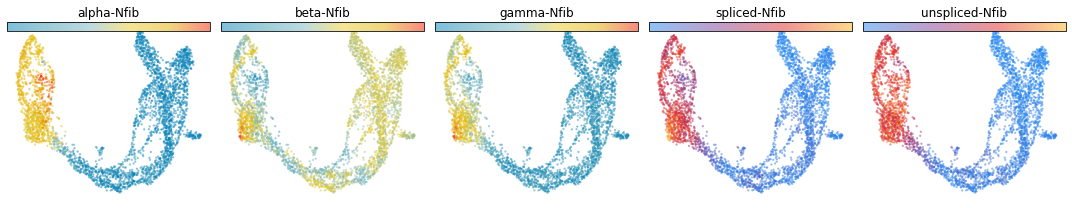

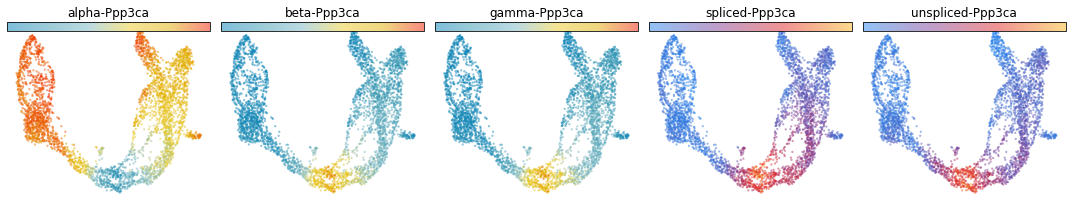

In [30]:
for gene in gene_list[0:5]:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],load_cellDancer, colors='spliced', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],load_cellDancer, colors='unspliced', 
                 gene_name=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

## UMAP using alpha, beta, and gamma

In [31]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha')
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'beta')
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'gamma')
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha_beta_gamma')

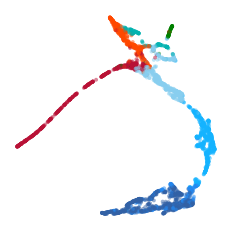

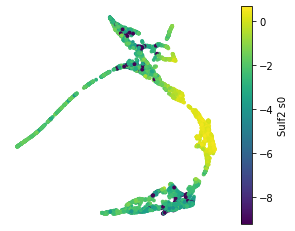

In [41]:
cdplt.cell.plot_para_umap('alpha',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha',load_cellDancer,gene_name='Sulf2',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

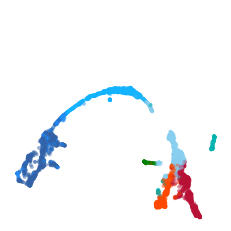

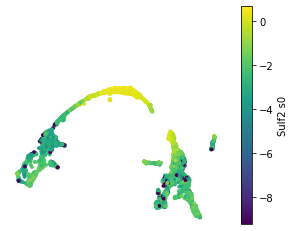

In [42]:
cdplt.cell.plot_para_umap('beta',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('beta',load_cellDancer,gene_name='Sulf2',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

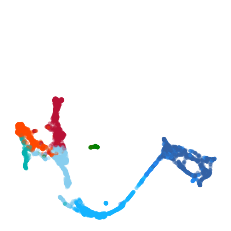

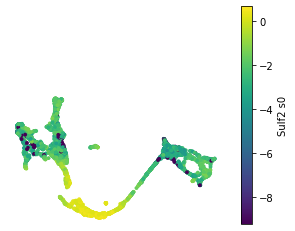

In [43]:
cdplt.cell.plot_para_umap('gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('gamma',load_cellDancer,gene_name='Sulf2',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

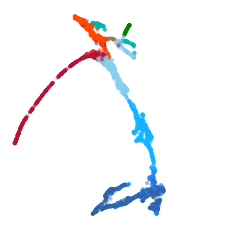

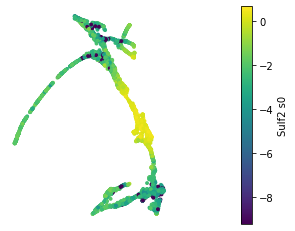

In [44]:
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,gene_name='Sulf2',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

## Rsquare rank

In [36]:
from celldancer.utilities import rank_rsquare

In [49]:
%load_ext autoreload
%autoreload 2

cluster_choice=list(load_cellDancer.clusters.drop_duplicates())
rsquare_rank=rank_rsquare(load_cellDancer,gene_list=gene_list,cluster_choice=cluster_choice)
rsquare_rank

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculate rsquare: 100%|████████████████████████| 28/28 [00:06<00:00,  4.49it/s]


,gene_name,r_square
0,Btbd17,0.976597
1,Sulf2,0.963845
2,Rbfox3,0.951194
3,Wfdc15b,0.947987
4,Map1b,0.939678
5,Nfib,0.927527
6,Adk,0.927370
7,Ppp3ca,0.920053
8,Smoc1,0.918295
9,Gnao1,0.916941
